## Task1

nH: 2, Test Loss: 0.0900, Test Accuracy: 0.7235
nH: 4, Test Loss: 0.0859, Test Accuracy: 0.7150
nH: 6, Test Loss: 0.0858, Test Accuracy: 0.7285
nH: 8, Test Loss: 0.0858, Test Accuracy: 0.7430
nH: 10, Test Loss: 0.0857, Test Accuracy: 0.7325
nH: 12, Test Loss: 0.0826, Test Accuracy: 0.7645
nH: 14, Test Loss: 0.0850, Test Accuracy: 0.7565
nH: 16, Test Loss: 0.0823, Test Accuracy: 0.7670
nH: 18, Test Loss: 0.0653, Test Accuracy: 0.8195
nH: 20, Test Loss: 0.0659, Test Accuracy: 0.8195
nH: 22, Test Loss: 0.0656, Test Accuracy: 0.8170
nH: 24, Test Loss: 0.0849, Test Accuracy: 0.7520
nH: 26, Test Loss: 0.0764, Test Accuracy: 0.7880
nH: 28, Test Loss: 0.0666, Test Accuracy: 0.8185
nH: 30, Test Loss: 0.0649, Test Accuracy: 0.8200
nH: 32, Test Loss: 0.0660, Test Accuracy: 0.8145
nH: 34, Test Loss: 0.0642, Test Accuracy: 0.8215
nH: 36, Test Loss: 0.0662, Test Accuracy: 0.8210
nH: 38, Test Loss: 0.0646, Test Accuracy: 0.8180
nH: 40, Test Loss: 0.0641, Test Accuracy: 0.8185
nH: 42, Test Loss: 0.064

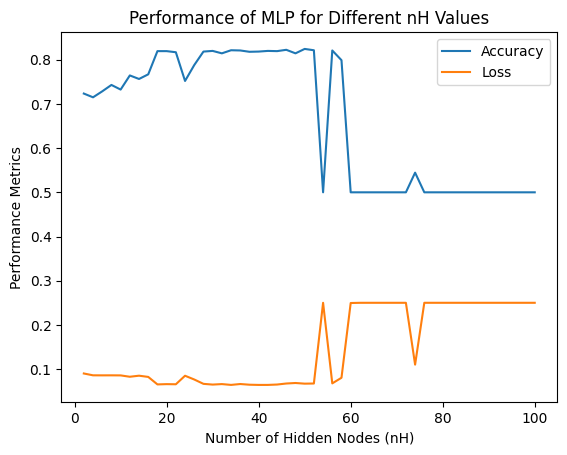

In [86]:
import numpy as np
import random
import matplotlib.pyplot as plt

def load_and_process_data(file_path):
    with open(f"./data_files/{file_path}.txt", 'r') as file:
        data_lines = file.read().split("\n")
    processed_data = []
    for line in data_lines:
        elements = line.split("  ")
        if len(elements) == 2:
            processed_data.append([float(elements[0]), float(elements[1])])
    return processed_data

def mix_datasets(dataset1, dataset2):
    combined_data = np.vstack((dataset1, dataset2))
    dataset_size = len(combined_data)
    labels = [[0] if i < dataset_size / 2 else [1] for i in range(dataset_size)]
    shuffled_indices = np.random.permutation(dataset_size)
    return combined_data[shuffled_indices], np.array(labels)[shuffled_indices]

def standardize_features(matrix, mean_values, std_values):
    normalized_matrix = (matrix - mean_values) / std_values
    return normalized_matrix

class MLPNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.init_network()

    def init_network(self):
        self.weights_input_to_hidden = np.random.rand(self.input_size, self.hidden_size)
        self.weights_hidden_to_output = np.random.rand(self.hidden_size, self.output_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))

    def activation(self, z):
        return 1 / (1 + np.exp(-z))

    def activation_derivative(self, z):
        return z * (1 - z)

    def forward_pass(self, inputs):
        self.hidden_layer_activation = self.activation(np.dot(inputs, self.weights_input_to_hidden) + self.bias_hidden)
        return self.activation(np.dot(self.hidden_layer_activation, self.weights_hidden_to_output) + self.bias_output)

    def backward_pass(self, inputs, expected_output, predicted_output):
        error = expected_output - predicted_output
        gradient_output = error * self.activation_derivative(predicted_output)
        gradient_hidden = np.dot(gradient_output, self.weights_hidden_to_output.T) * self.activation_derivative(self.hidden_layer_activation)
        
        delta_weights_output = np.dot(self.hidden_layer_activation.T, gradient_output)
        delta_weights_input = np.dot(inputs.T, gradient_hidden)
        
        self.weights_input_to_hidden += self.learning_rate * delta_weights_input
        self.weights_hidden_to_output += self.learning_rate * delta_weights_output
        self.bias_hidden += self.learning_rate * np.sum(gradient_hidden, axis=0, keepdims=True)
        self.bias_output += self.learning_rate * np.sum(gradient_output, axis=0, keepdims=True)

    def train(self, training_inputs, training_labels, batch_size, epochs):
        for epoch in range(epochs):
            for i in range(0, len(training_inputs), batch_size):
                batch_input = training_inputs[i:i + batch_size]
                batch_labels = training_labels[i:i + batch_size]
                predictions = self.forward_pass(batch_input)
                self.backward_pass(batch_input, batch_labels, predictions)


    def evaluate(self, test_inputs, test_labels):
        predictions = self.forward_pass(test_inputs)
        loss = np.mean((test_labels - predictions) ** 2) / 2
        accuracy = np.mean((test_labels == (predictions > 0.5)).astype(int))
        return loss, accuracy

# Load training data
class1_train = np.array(load_and_process_data("Train1"))
class2_train = np.array(load_and_process_data("Train2"))

# Load testing data
class1_test = np.array(load_and_process_data("Test1"))
class2_test = np.array(load_and_process_data("Test2"))

# Create mixed datasets for training and testing
train_data, train_labels = mix_datasets(class1_train, class2_train)
test_data, test_labels = mix_datasets(class1_test, class2_test)

mean_train, std_train = np.mean(train_data, axis=0), np.std(train_data, axis=0)
train_data_normalized = standardize_features(train_data, mean_train, std_train)
test_data_normalized = standardize_features(test_data, mean_train, std_train)

# Initialize and train the network
nh_values = [i for i in range(2, 101) if i % 2 == 0]  # Hidden nodes configurations
nh_performance = []

for nh in nh_values:
    # Initialize and train the network for each nh value
    mlp_model = MLPNetwork(2, nh, 1, 0.01)
    mlp_model.train(train_data_normalized, train_labels, 10, 200)
    
    # Evaluate the network and store the performance
    loss, acc = mlp_model.evaluate(test_data_normalized, test_labels)
    nh_performance.append((nh, loss, acc))
    print(f'nH: {nh}, Test Loss: {loss:.4f}, Test Accuracy: {acc:.4f}')

# Plotting the performance for each nH value
nh_values, losses, accuracies = zip(*nh_performance)
plt.plot(nh_values, accuracies, label='Accuracy')
plt.plot(nh_values, losses, label='Loss')
plt.xlabel('Number of Hidden Nodes (nH)')
plt.ylabel('Performance Metrics')
plt.title('Performance of MLP for Different nH Values')
plt.legend()
plt.show()

## Task 2

313/313 - 2s - loss: 0.0415 - accuracy: 0.9882 - 2s/epoch - 6ms/step
Kernel Size: (3, 3), Feature Maps: [16, 32], Dense Nodes: [128, 64], Accuracy: 0.9882000088691711
313/313 - 2s - loss: 0.0402 - accuracy: 0.9883 - 2s/epoch - 6ms/step
Kernel Size: (2, 2), Feature Maps: [16, 32], Dense Nodes: [128, 64], Accuracy: 0.9883000254631042
313/313 - 4s - loss: 0.0411 - accuracy: 0.9894 - 4s/epoch - 11ms/step
Kernel Size: (3, 3), Feature Maps: [32, 64], Dense Nodes: [128, 64], Accuracy: 0.9894000291824341
313/313 - 1s - loss: 0.0456 - accuracy: 0.9875 - 1s/epoch - 5ms/step
Kernel Size: (3, 3), Feature Maps: [16, 32], Dense Nodes: [64, 32], Accuracy: 0.987500011920929
313/313 - 2s - loss: 0.0396 - accuracy: 0.9901 - 2s/epoch - 6ms/step
Kernel Size: (3, 3), Feature Maps: [16, 32], Dense Nodes: [256, 128], Accuracy: 0.9901000261306763


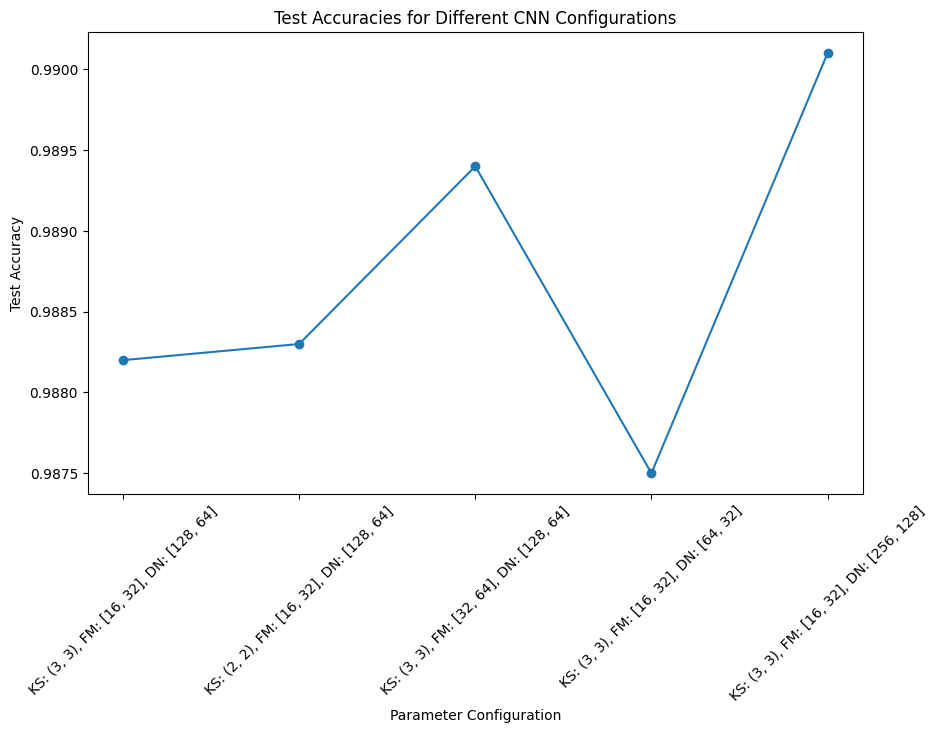

In [91]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Loading MNIST dataset
(training_images, training_labels), (testing_images, testing_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
training_images = training_images / 255.0
testing_images = testing_images / 255.0

# Reshape images to fit the model input requirements
training_images = training_images.reshape((60000, 28, 28, 1))
testing_images = testing_images.reshape((10000, 28, 28, 1))

def build_and_train_model(kernel_size, num_feature_maps, dense_layer_nodes, epochs=5):
    cnn_model = models.Sequential([
        layers.Conv2D(num_feature_maps[0], kernel_size, activation='relu', input_shape=(28, 28, 1), strides=1),
        layers.MaxPooling2D((2, 2), strides=1),
        layers.Conv2D(num_feature_maps[1], kernel_size, activation='relu', strides=1),
        layers.MaxPooling2D((2, 2), strides=1),
        layers.Flatten(),
        layers.Dense(dense_layer_nodes[0], activation='relu'),
        layers.Dense(dense_layer_nodes[1], activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    cnn_model.fit(training_images, training_labels, epochs=epochs, verbose=0)
    test_accuracy = cnn_model.evaluate(testing_images, testing_labels, verbose=2)[1]
    return test_accuracy

# Parameters for experimentation
params = [
    ((3, 3), [16, 32], [128, 64]),
    ((2, 2), [16, 32], [128, 64]),  # Smaller kernel size
    ((3, 3), [32, 64], [128, 64]),  # More feature maps
    ((3, 3), [16, 32], [64, 32]),   # Fewer nodes in dense layers
    ((3, 3), [16, 32], [256, 128])  # More nodes in dense layers
]


accuracies = []
config_labels = []

for kernel_size, num_feature_maps, dense_layer_nodes in params:
    acc = build_and_train_model(kernel_size, num_feature_maps, dense_layer_nodes)
    accuracies.append(acc)
    config_labels.append(f'KS: {kernel_size}, FM: {num_feature_maps}, DN: {dense_layer_nodes}')
    print(f'Kernel Size: {kernel_size}, Feature Maps: {num_feature_maps}, Dense Nodes: {dense_layer_nodes}, Accuracy: {acc}')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(config_labels, accuracies, marker='o')
plt.xlabel('Parameter Configuration')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracies for Different CNN Configurations')
plt.xticks(rotation=45)
plt.show()

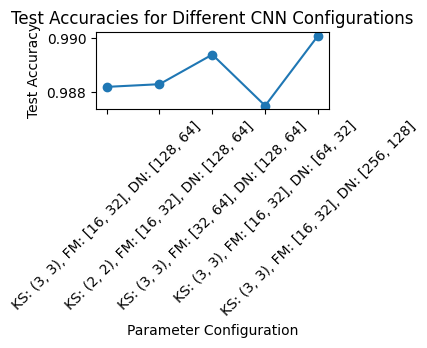

In [93]:
plt.figure(figsize=(3, 1))
plt.plot(config_labels, accuracies, marker='o')
plt.xlabel('Parameter Configuration')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracies for Different CNN Configurations')
plt.xticks(rotation=45)
plt.show()